In [ ]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

## tests

In [3]:
img = mpimg.imread('car.jpg')
print('Image dimensions:', img.shape)

Image dimensions: (1000, 1000, 3)


$$
G = 0.3r + 0.59g + 0.11b
$$

In [ ]:
gray = rgb2gray(img)

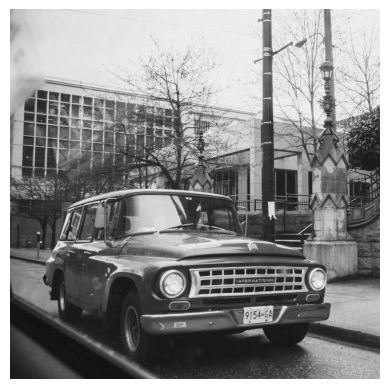

In [5]:
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

(-0.5, 999.5, 999.5, -0.5)

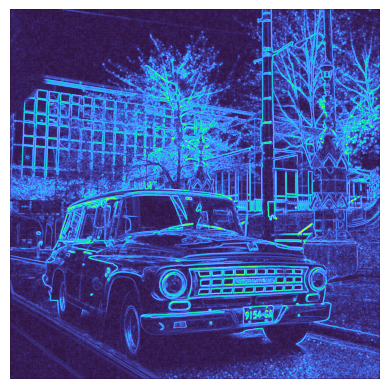

In [14]:
plt.imshow(gradG, cmap=plt.get_cmap('turbo'))
plt.axis('off')


(-0.5, 999.5, 999.5, -0.5)

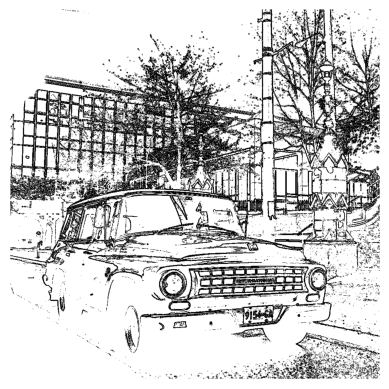

In [ ]:
mask = np.where(gradG > 15, 0, 1)
plt.imshow(mask, cmap=plt.get_cmap('gray'))
plt.axis('off')

## detect edges

In [60]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.3, 0.59, 0.11])

def nablaG(G,x,y,h=1):
    delx = (G[x+h,y]-G[x-h,y])/(2*h)
    dely = (G[x,y+h]-G[x,y-h])/(2*h)
    return (delx, dely)

def gradient(img):
    n = img.shape
    grad = np.zeros((img.shape[0], img.shape[1]), dtype=float)
    for x in range(1, img.shape[0]-1):
        for y in range(1, img.shape[1]-1):
            g = nablaG(img, x, y)
            grad[x, y] = np.sqrt(g[0]**2+g[1]**2)
            # grad[x, y] = abs(np.degrees(np.arctan2(g[1], g[0])))
    return grad

def hessian(img, h=1):
    n = img.shape
    hess = np.zeros((img.shape[0], img.shape[1]), dtype=float)
    for x in range(1, img.shape[0]-1):
        for y in range(1, img.shape[1]-1):
            hess[x, y] = img[x+h, y+h] + img[x-h, y-h] - img[x+h, y-h] - img[x-h, y+h]
    return hess[1:-1, 1:-1]

def detect_edges(file):
    img = mpimg.imread(file)
    gray = rgb2gray(img)
    gradG = gradient(gray)
    hess = hessian(gray)
    # plt.imshow(gradG, cmap=plt.get_cmap('turbo'))
    return gradG, hess

In [61]:
grad, hess = detect_edges('cara.png')
# plt.imshow(hess)
hess

array([[ 0.00509804,  0.00392157,  0.00231373, ...,  0.00392157,
         0.00784314,  0.00784314],
       [ 0.00392157,  0.00784314,  0.00392157, ...,  0.        ,
         0.00392157,  0.00392157],
       [ 0.00392157,  0.00784314,  0.00435294, ..., -0.00392157,
         0.        ,  0.00392157],
       ...,
       [ 0.00231373,  0.00231373, -0.0034902 , ..., -0.02192157,
        -0.01686274, -0.00552941],
       [-0.01568627, -0.0027451 ,  0.00827451, ..., -0.02901961,
        -0.02121569,  0.00317647],
       [-0.02701961, -0.00231373,  0.01294118, ..., -0.01611765,
        -0.01960784,  0.00596078]])

In [64]:
# plt.imshow(hess, cmap=plt.get_cmap('gray'))
# plt.imshow(, cmap=plt.get_cmap('gray'))
np.linalg.eig(hess)

EigResult(eigenvalues=array([-1.78509086e+00+2.73589260e-01j, -1.78509086e+00-2.73589260e-01j,
        1.23730436e+00+1.10897773e+00j,  1.23730436e+00-1.10897773e+00j,
        1.65531630e+00+0.00000000e+00j,  5.14580877e-01+1.63005231e+00j,
        5.14580877e-01-1.63005231e+00j,  7.22977319e-01+1.52548665e+00j,
        7.22977319e-01-1.52548665e+00j,  1.39535991e+00+7.70948974e-01j,
        1.39535991e+00-7.70948974e-01j,  1.47878526e+00+5.83248372e-01j,
        1.47878526e+00-5.83248372e-01j,  1.29549023e+00+8.05438024e-01j,
        1.29549023e+00-8.05438024e-01j,  1.43148774e+00+3.61648126e-01j,
        1.43148774e+00-3.61648126e-01j,  1.45405387e+00+0.00000000e+00j,
       -7.59378519e-01+1.58109166e+00j, -7.59378519e-01-1.58109166e+00j,
       -1.34857579e-01+1.70551920e+00j, -1.34857579e-01-1.70551920e+00j,
        7.96742893e-01+1.24832811e+00j,  7.96742893e-01-1.24832811e+00j,
        5.89416990e-01+1.40440240e+00j,  5.89416990e-01-1.40440240e+00j,
        2.04899998e-01+1.5962

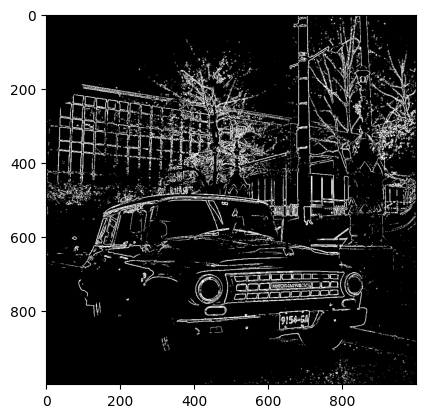

In [10]:
mask1 = np.where(grad1 > 30, 1, 0)
plt.imshow(mask1, cmap=plt.get_cmap('gray'))

(-0.5, 748.5, 1059.5, -0.5)

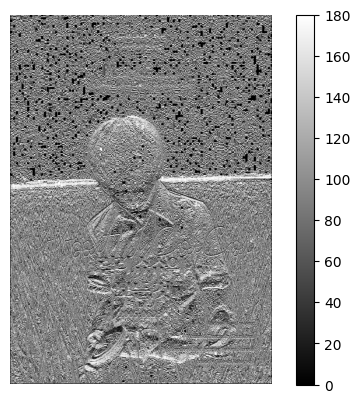

In [78]:
grad2 = detect_edges('lily.jpg')
plt.colorbar()
plt.axis('off')

(-0.5, 748.5, 1059.5, -0.5)

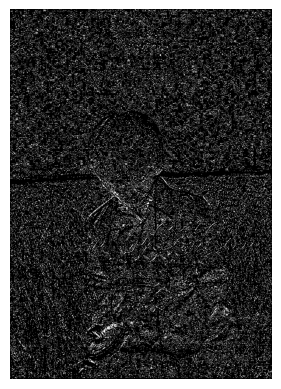

In [79]:
t = 15
mask1 = np.where((grad2 > 45-t) & (grad2 < 45+t), 1, 0)
plt.imshow(mask1, cmap=plt.get_cmap('gray'))
plt.axis('off')

(-0.5, 999.5, 999.5, -0.5)

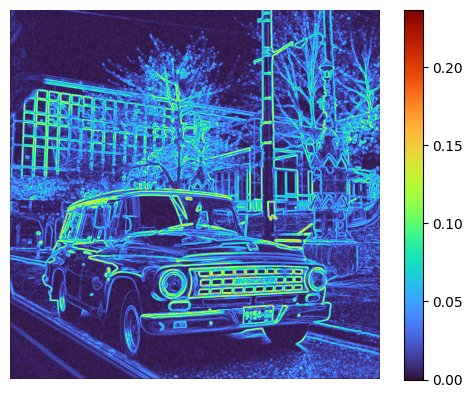

In [12]:
grad2 = detect_edges('cara.png')
plt.colorbar()
plt.axis('off')

In [101]:
np.max(grad2)/4

0.05919951951364513

(0.05919951951364513, 0.0)

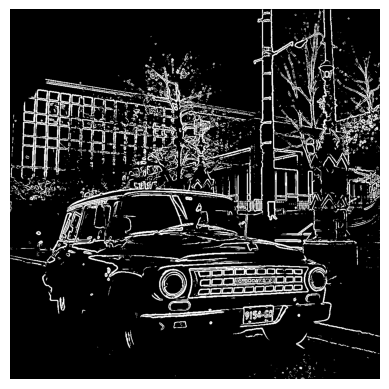

In [22]:
# t = 15
# mask1 = np.where((grad2 > 45-t) & (grad2 < 45+t), 1, 0)
mask1 = np.where(grad2 > 0.06, 1, 0)
plt.imshow(mask1, cmap=plt.get_cmap('gray'))
plt.axis('off')
np.max(grad2)/4, np.min(grad2)

In [ ]:
def show_edges(file, k=0.25, size=(12, 8)): 
    gradient_matrix, hess = detect_edges(file)
    edge_us = np.where(gradient_matrix > np.max(gradient_matrix)*k, 1, 0)
    img = cv.imread(file, cv.IMREAD_GRAYSCALE)
    edges = cv.Canny(img,100,200)

    plt.figure(figsize=size)    
    plt.subplot(231),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(232),plt.imshow(gradient_matrix,cmap = 'gray')
    plt.title('Gradient Matrix'), plt.xticks([]), plt.yticks([])
    plt.subplot(233),plt.imshow(edge_us,cmap = 'gray')
    plt.title('Our Edge Detection'), plt.xticks([]), plt.yticks([])
    plt.subplot(234),plt.imshow(hess,cmap = 'gray')
    plt.title('Hessian Matrix'), plt.xticks([]), plt.yticks([])
    plt.subplot(236),plt.imshow(edges,cmap = 'gray')
    plt.title('OpenCV Edge\nDetection'), plt.xticks([]), plt.yticks([])
    
    plt.show()

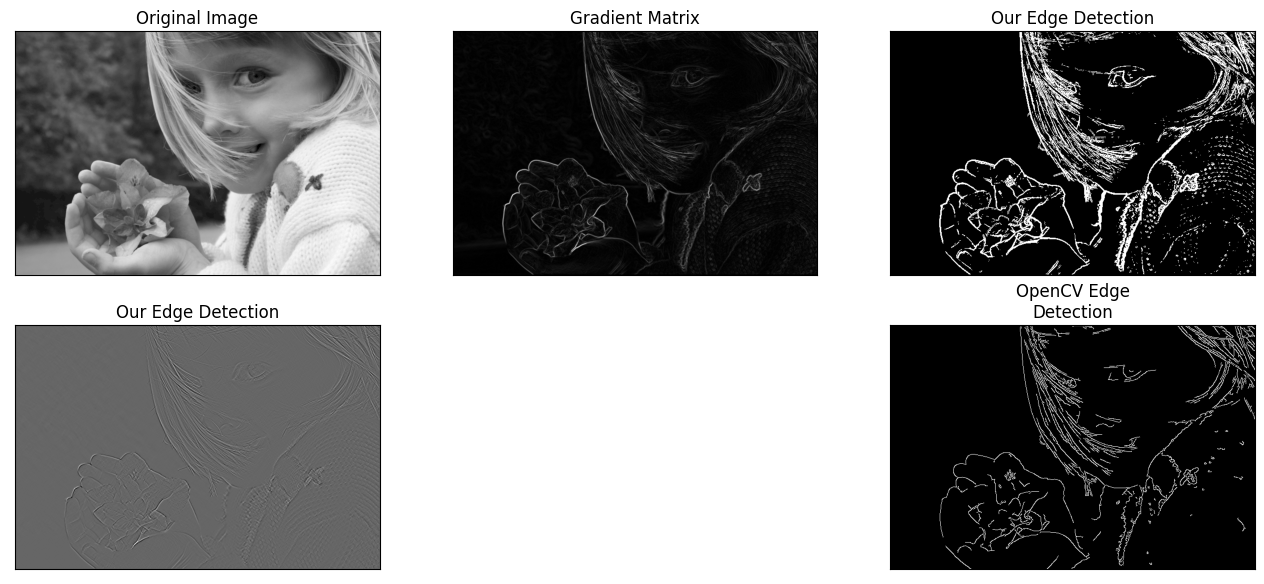

In [48]:
show_edges('kid.png', k=0.1, size=(16,7))

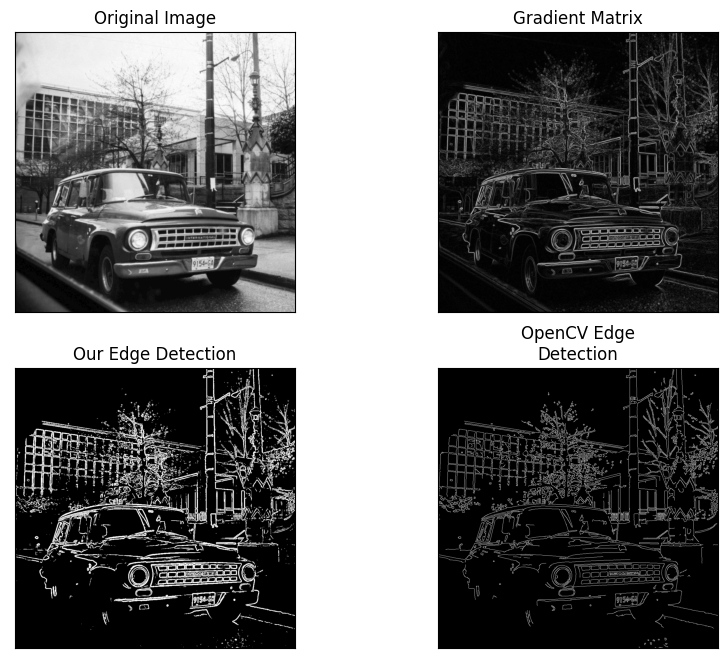

In [37]:
show_edges('cara.png', k=0.25, size=(10,8))

In [ ]:
def hessian(img):
    

In [ ]:
import numpy as np
#Gradient Function
def gradient_f(x, f):
  assert (x.shape[0] >= x.shape[1]), "the vector should be a column vector"
  x = x.astype(float)
  N = x.shape[0]
  gradient = []
  for i in range(N):
    eps = abs(x[i]) *  np.finfo(np.float32).eps 
    xx0 = 1. * x[i]
    f0 = f(x)
    x[i] = x[i] + eps
    f1 = f(x)
    gradient.append(np.asscalar(np.array([f1 - f0]))/eps)
    x[i] = xx0
  return np.array(gradient).reshape(x.shape)

#Hessian Matrix
def hessian (x, the_func):
  N = x.shape[0]
  hessian = np.zeros((N,N)) 
  gd_0 = gradient_f( x, the_func)
  eps = np.linalg.norm(gd_0) * np.finfo(np.float32).eps 
  for i in range(N):
    xx0 = 1.*x[i]
    x[i] = xx0 + eps
    gd_1 =  gradient_f(x, the_func)
    hessian[:,i] = ((gd_1 - gd_0)/eps).reshape(x.shape[0])
    x[i] =xx0
  return hessian

plt.imshow(hessian(gray, ), cmap=plt.get_cmap('gray'))

C:\Users\user\AppData\Local\Temp\ipykernel_9540\3806197727.py:10: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  h_matrix = hessian_matrix(image, sigma=2.0)


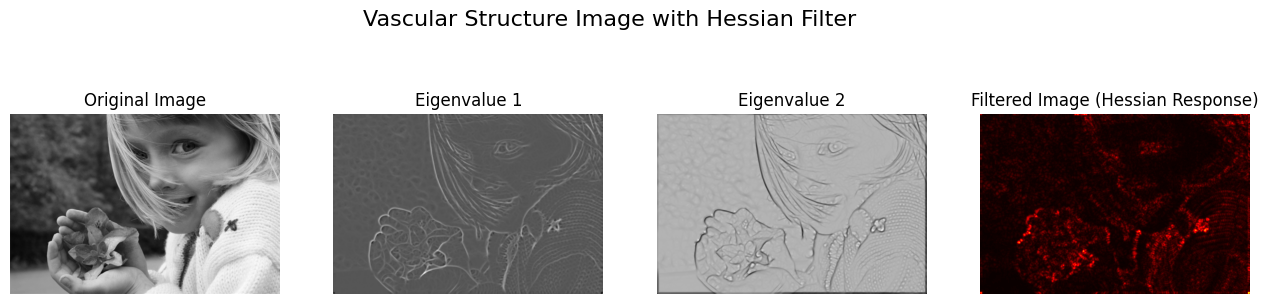

In [67]:
from skimage import io, color
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from skimage.filters import gaussian

# Load the provided image
image_path = 'kid.png'
image = io.imread(image_path, as_gray=True)  

# Compute the Hessian matrix
h_matrix = hessian_matrix(image, sigma=2.0)

# Compute the eigenvalues of the Hessian matrix
eigvals = hessian_matrix_eigvals(h_matrix)

# Calculate the Hessian response using the minimum of the absolute eigenvalues
hessian_response = np.minimum(np.abs(eigvals[0]), np.abs(eigvals[1]))

# Apply Gaussian smoothing to the Hessian response for a cleaner visualization
filtered_image = gaussian(hessian_response, sigma=1)

# Display the original image, eigenvalues, and filtered response
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Eigenvalue 1
axes[1].imshow(eigvals[0], cmap='gray')
axes[1].set_title("Eigenvalue 1")
axes[1].axis('off')

# Eigenvalue 2
axes[2].imshow(eigvals[1], cmap='gray')
axes[2].set_title("Eigenvalue 2")
axes[2].axis('off')

# Filtered Hessian Response
axes[3].imshow(filtered_image, cmap='hot')
axes[3].set_title("Filtered Image (Hessian Response)")
axes[3].axis('off')

plt.suptitle("Vascular Structure Image with Hessian Filter", fontsize=16)
plt.show()